In [1]:
from prevelop import preparation, exploration, clustering, evaluation

__Data Preparation and Preprocessing__

In [2]:
### Load the data (Mac)
# Load the cad-data
cad_data = preparation.load_data(r"demo_data/Römheld_cad.xlsx")
# load process-data
process_data = preparation.load_data(r"demo_data/Römheld_prozess.xlsx")
# load link data
link_data = preparation.load_data(r"demo_data/Römheld_teile_zeichnungen.xlsx")

In [3]:
### clear data
# for cad-data received from SIMUS, apply the following cleaning steps
cad_data = preparation.clear_cad_data(cad_data)

In [4]:
### clean process data
# delete all rows with value 99999 in column 'BELEGUNGSEINHEIT_NR'
process_data = process_data[process_data['BELEGUNGSEINHEIT_NR'] != 99999]

In [5]:
### aggregate process data
process_data = preparation.aggregate_data(process_data, key='Teil', columns=['BELEGUNGSEINHEIT_NR'], methods=['encode'])

In [6]:
### prepare the data
# select numerical, binary and categorical columns for preprocessing
num_columns = ['L [mm]', 'B [mm]', 'H [mm]', 'Volumen [mm3]', 'Masse [kg]', 'Flächeninhalt [mm2]', 'Da max. [mm]', 'Di min. [mm]']
cat_columns = ['Klasse']
bin_columns = [column for column in process_data.columns if column != 'Teil']

data, data_preprocessed = preparation.prepare_data(cad_data, process_data, link_data, num_columns, bin_columns, cat_columns, key_cad='Zeichnung', key_process='Teil')

__Exploration__

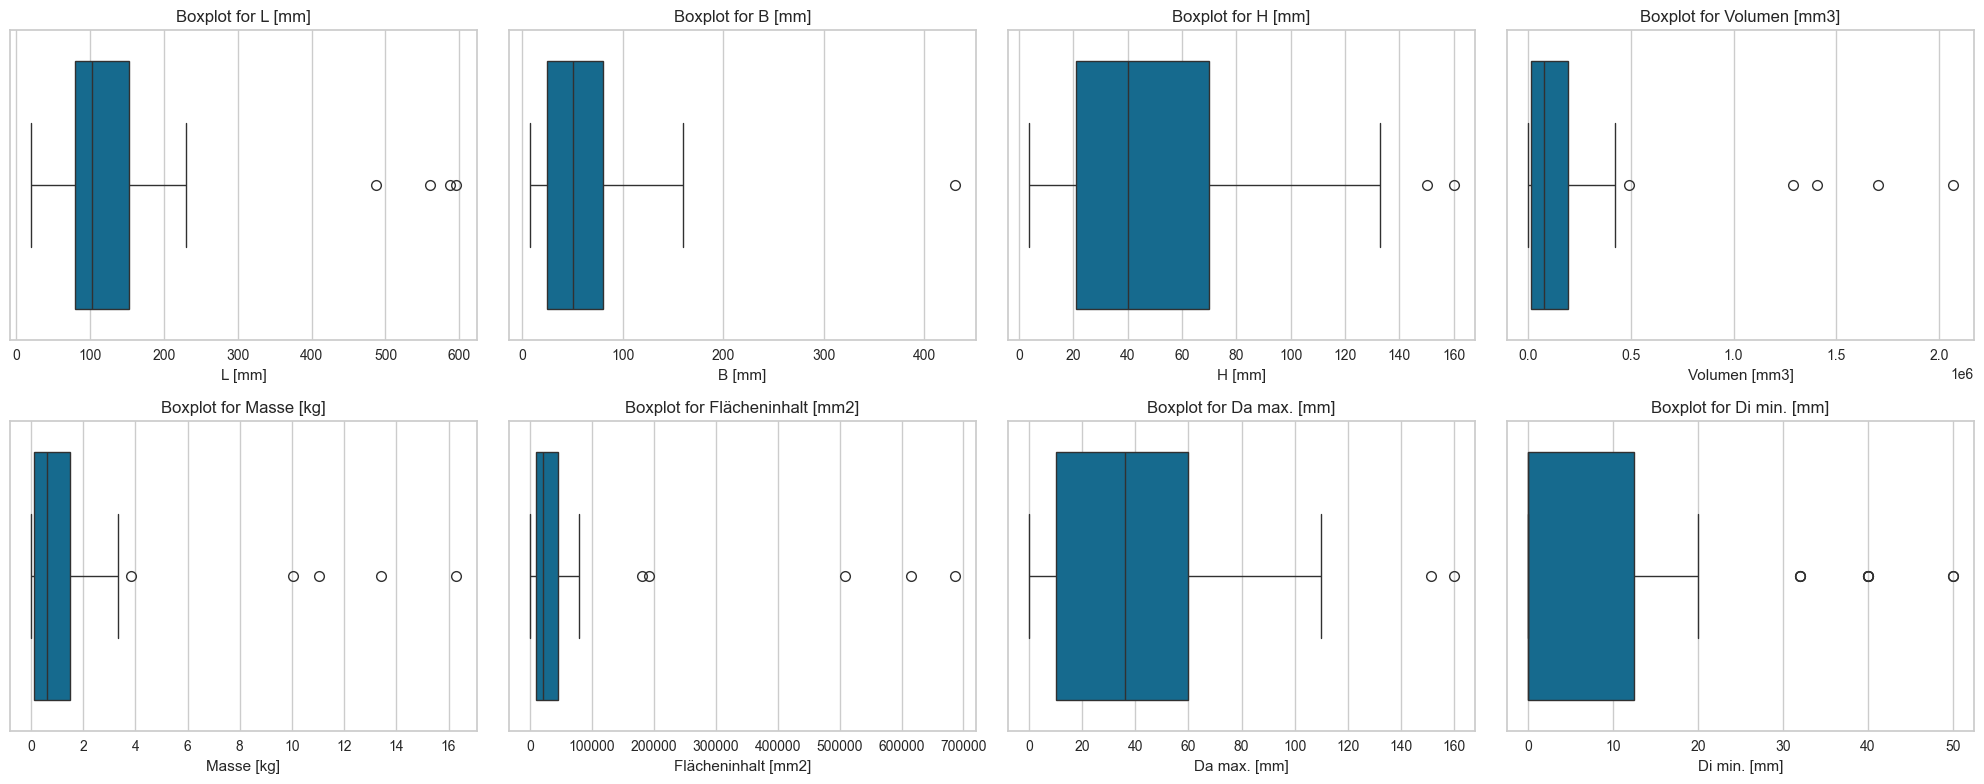

In [7]:
# show boxplots of the numerical columns
exploration.boxplots(data, num_columns)

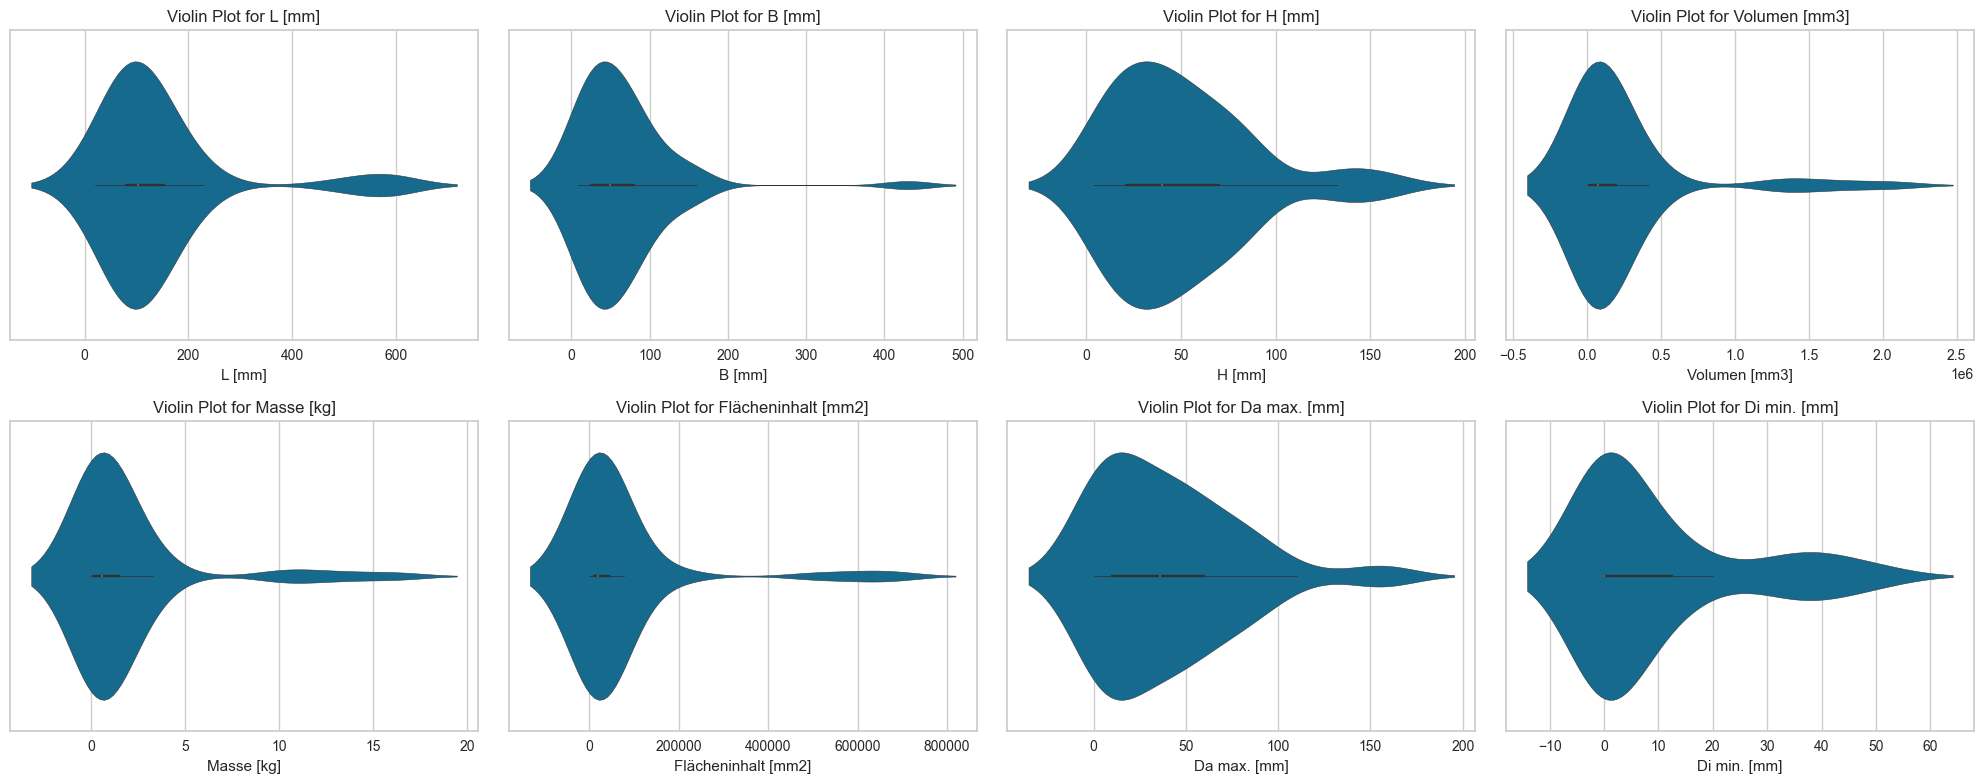

In [8]:
# show violonplot of data
exploration.violinplots(data, num_columns)

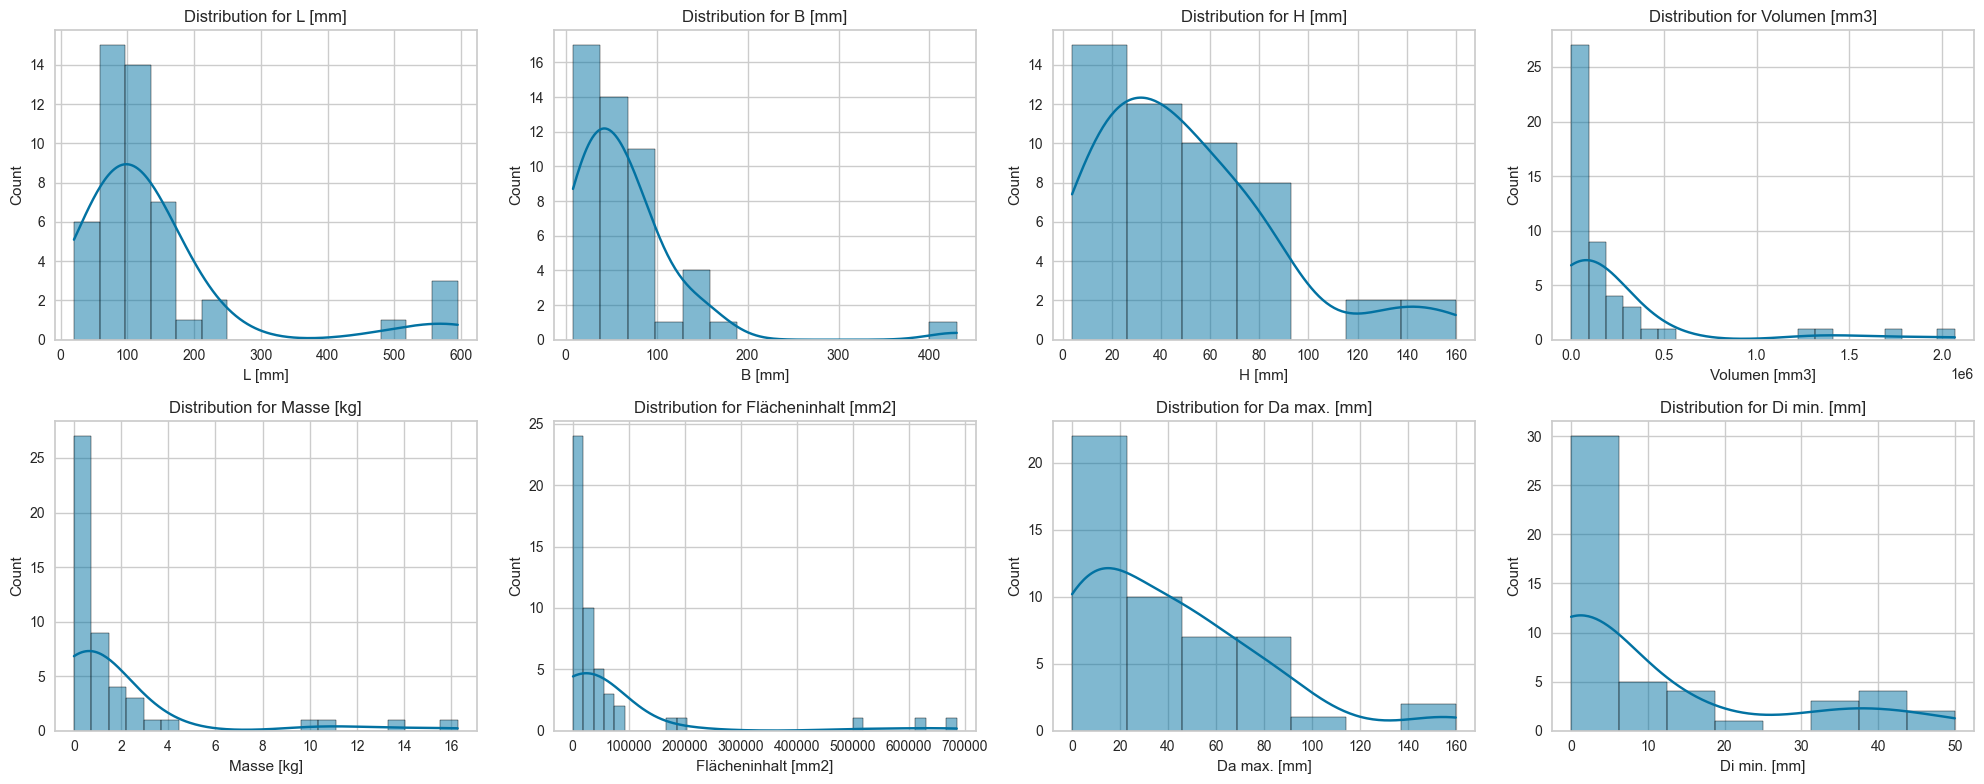

In [9]:
# show histograms of categorical columns
exploration.distributions(data, num_columns)

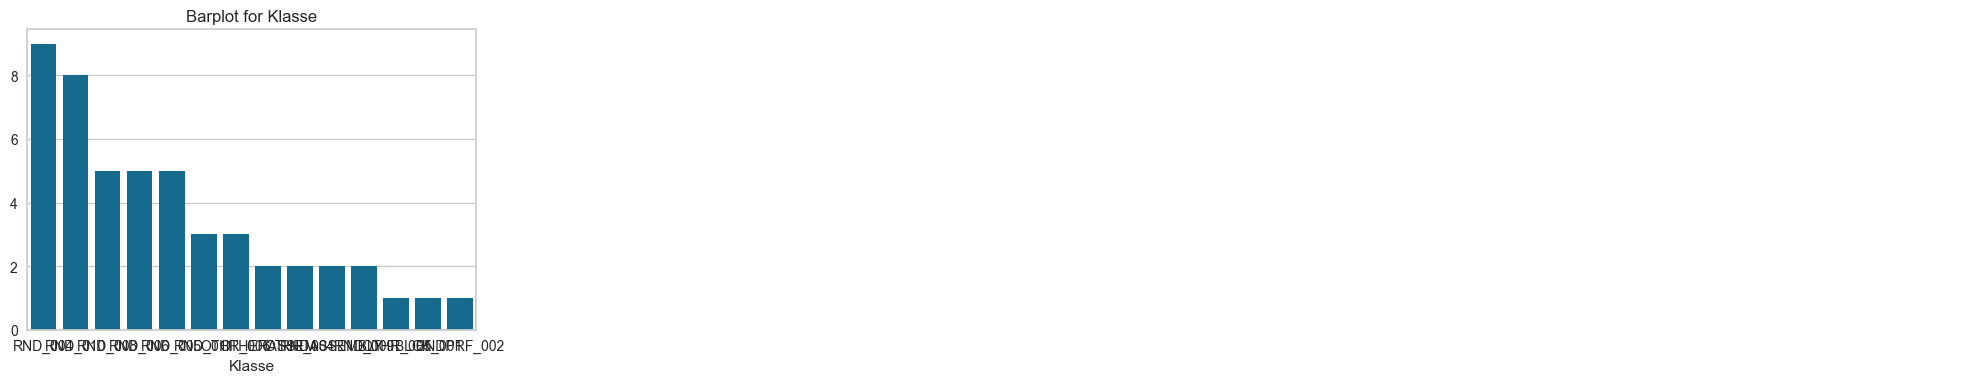

In [10]:
# show parallel_coordinates_plot of data
exploration.barplots(data, cat_columns)

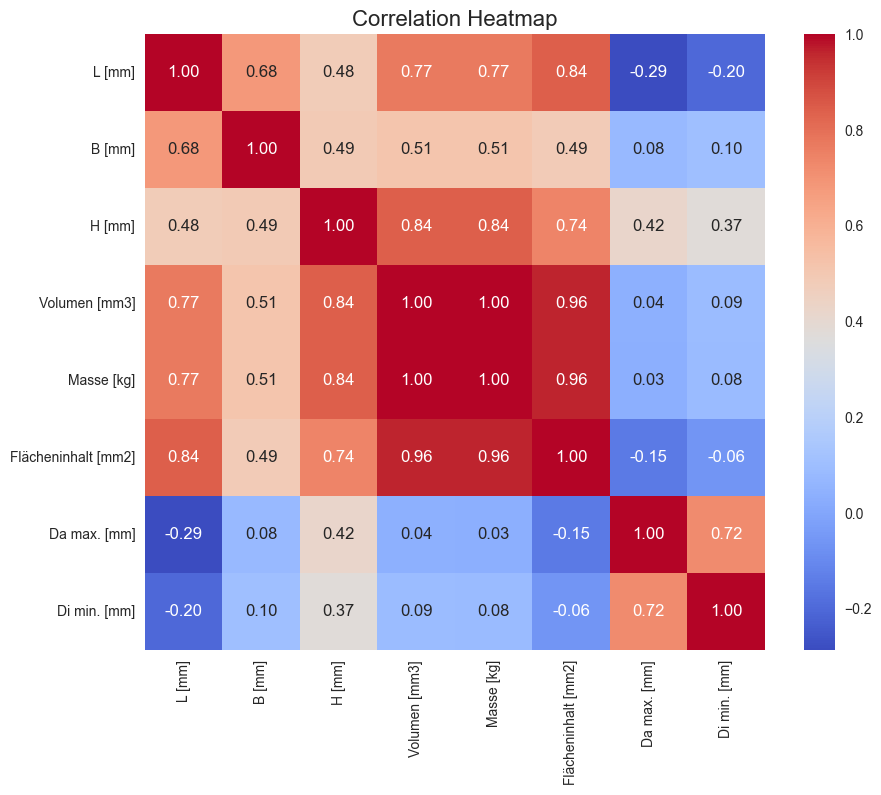

In [11]:
# show heatmap of data
exploration.heatmap(data, num_columns)

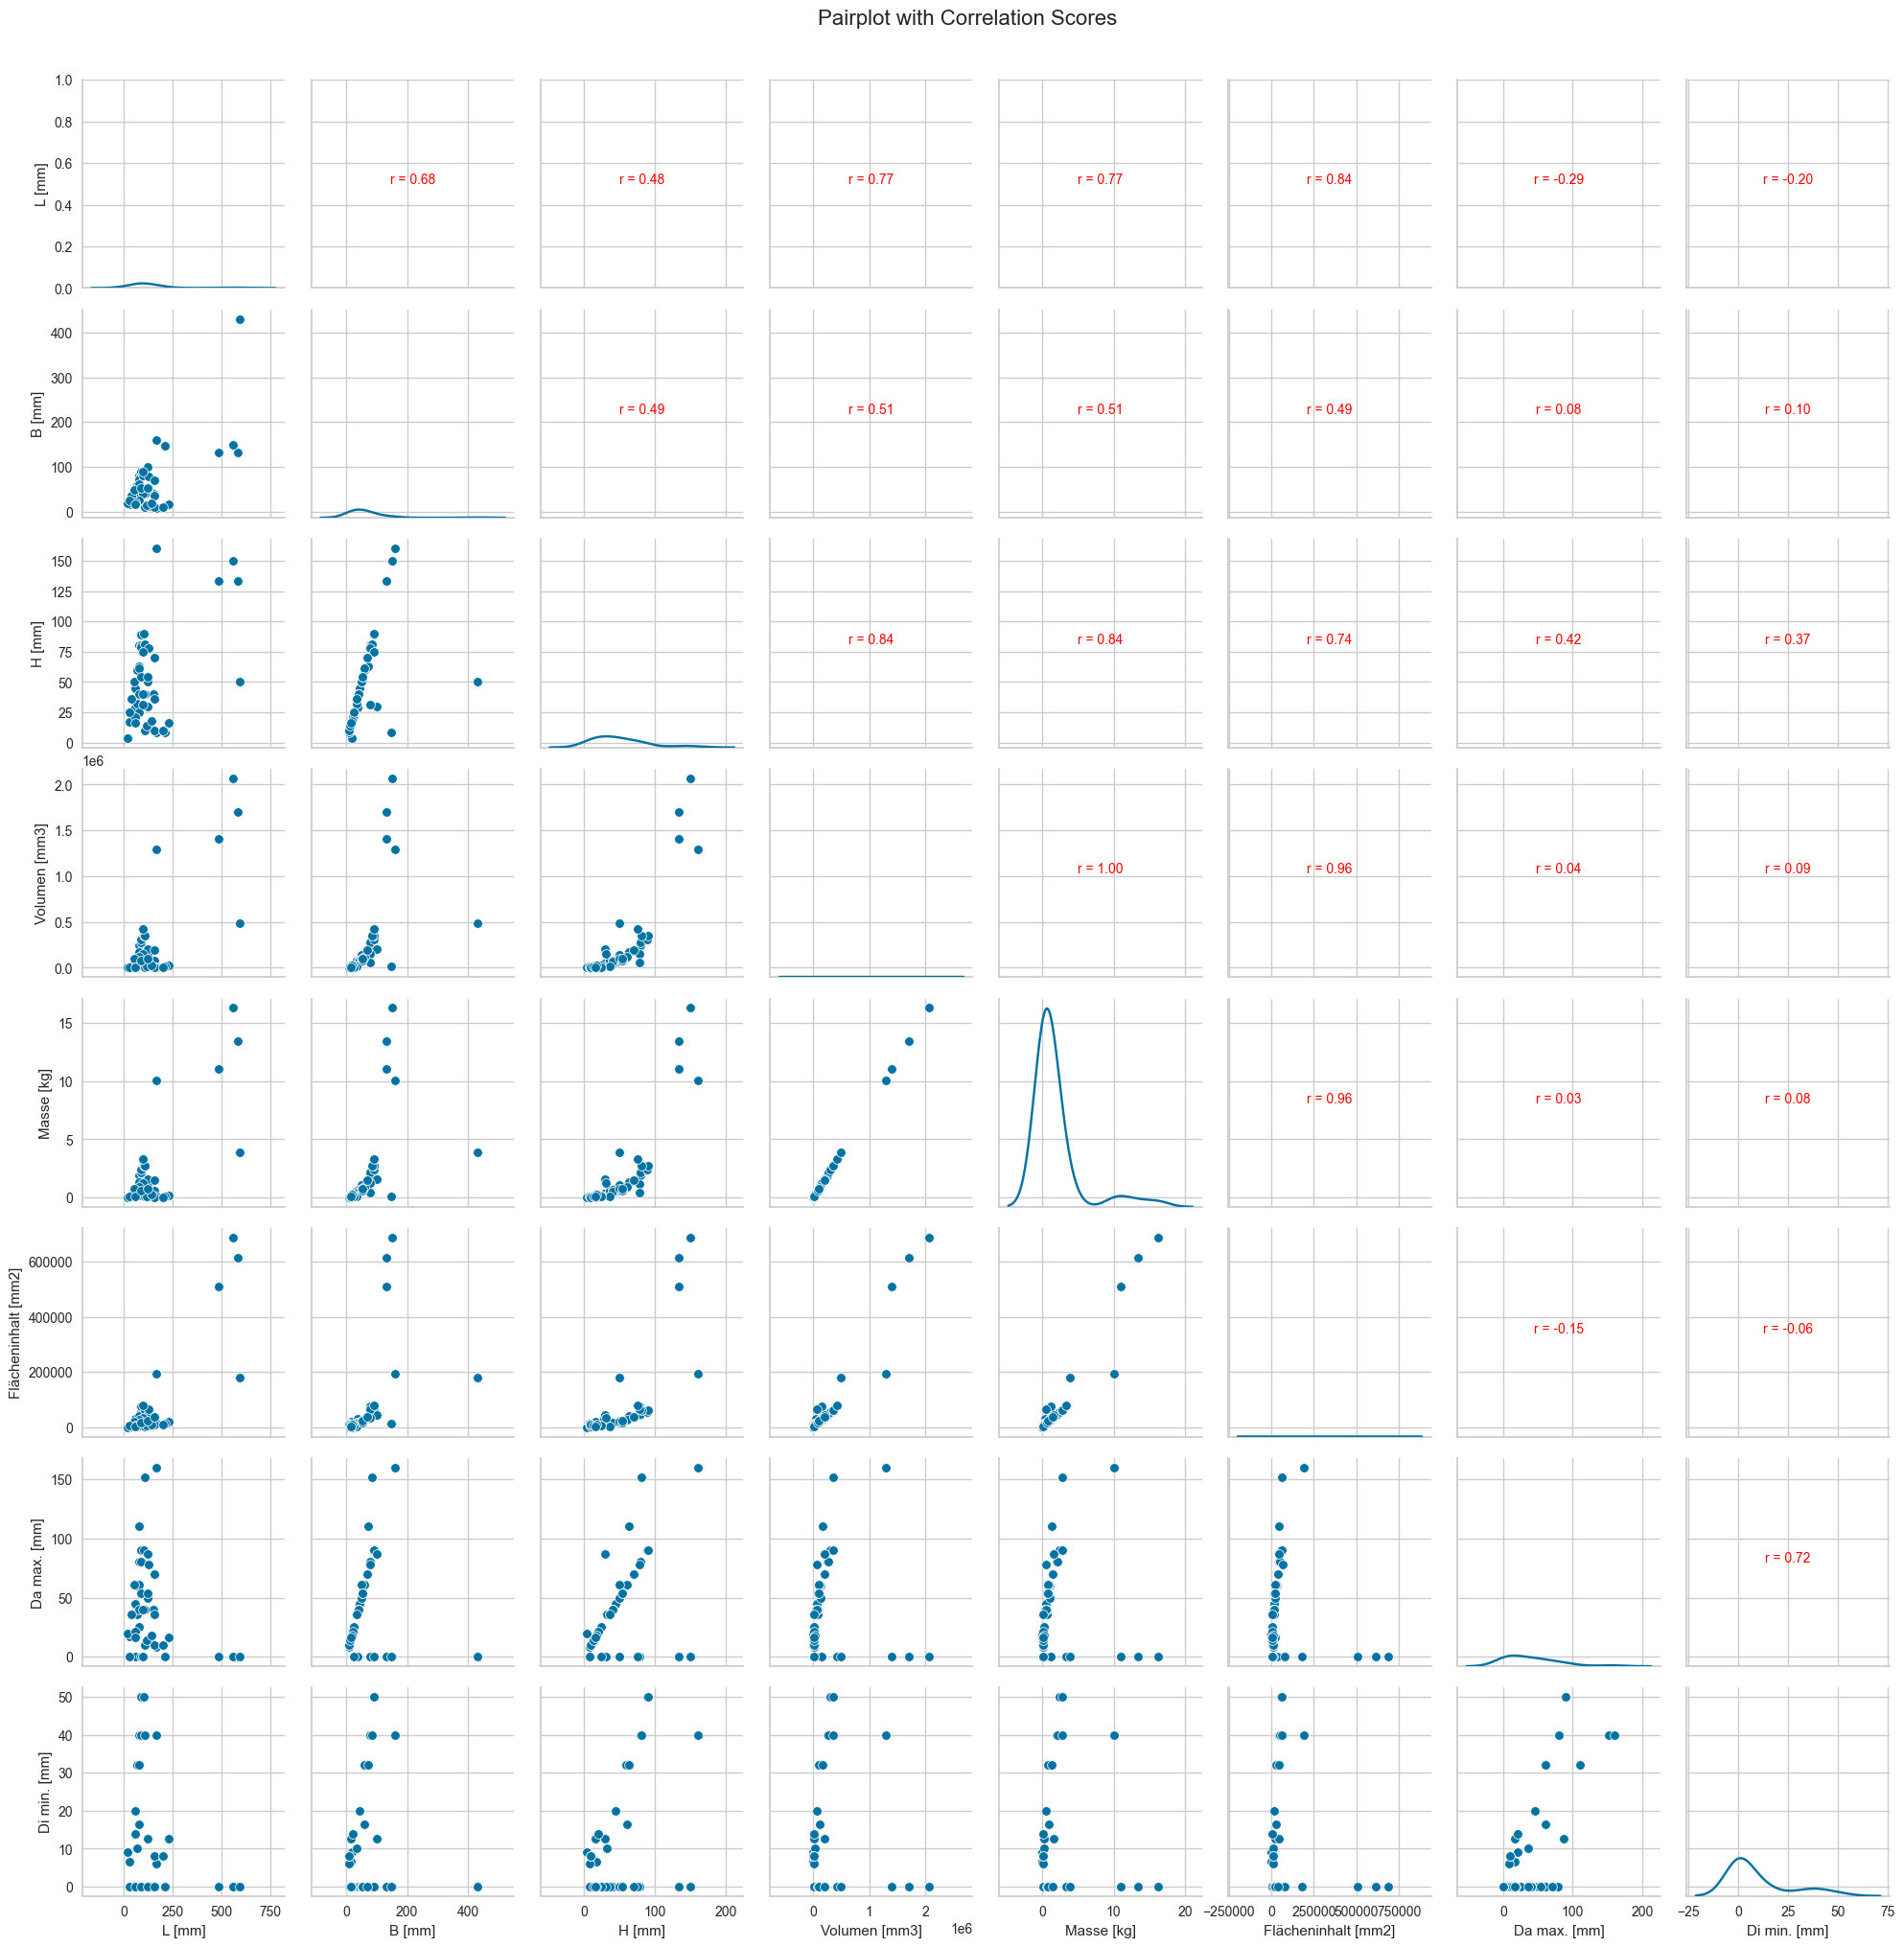

In [12]:
# show pairplot of data
exploration.pairplot(data, num_columns)

In [13]:
# z-score analysis of data
exploration.z_score_analysis(data, num_columns)

,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm],...,BELEGUNGSEINHEIT_NR 63720,BELEGUNGSEINHEIT_NR 68200,BELEGUNGSEINHEIT_NR 64102,BELEGUNGSEINHEIT_NR 64103,BELEGUNGSEINHEIT_NR 68205,BELEGUNGSEINHEIT_NR 96501,BELEGUNGSEINHEIT_NR 64506,BELEGUNGSEINHEIT_NR 62203,BELEGUNGSEINHEIT_NR 66300,BELEGUNGSEINHEIT_NR 63101
Teil,,,,,,,,,,,,,,,,,,,,,
3656546,OTHR_006,1404514.91,11.054,508158.1,487.0,133.0,133.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3656547,OTHR_006,1705082.50,13.419,615003.6,587.0,133.0,133.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
3656552,OTHR_006,2067654.99,16.272,685802.1,560.0,150.0,150.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
503200034,OTHERASSEM,488550.81,3.845,180774.7,595.0,430.0,50.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
520100768,RND_009,1288963.97,10.054,192009.3,170.0,160.0,160.0,170.0,160.0,40.0,...,0,0,0,0,0,1,0,0,0,1


In [14]:
# apply isolation forest to detect outliers
exploration.isolation_forest(data, num_columns)

,Klasse,Volumen [mm3],Masse [kg],Flächeninhalt [mm2],L [mm],B [mm],H [mm],Lrot [mm],Da max. [mm],Di min. [mm],...,BELEGUNGSEINHEIT_NR 63720,BELEGUNGSEINHEIT_NR 68200,BELEGUNGSEINHEIT_NR 64102,BELEGUNGSEINHEIT_NR 64103,BELEGUNGSEINHEIT_NR 68205,BELEGUNGSEINHEIT_NR 96501,BELEGUNGSEINHEIT_NR 64506,BELEGUNGSEINHEIT_NR 62203,BELEGUNGSEINHEIT_NR 66300,BELEGUNGSEINHEIT_NR 63101
Teil,,,,,,,,,,,,,,,,,,,,,
3656552,OTHR_006,2067654.99,16.272,685802.1,560.0,150.0,150.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,0,0,1
503200034,OTHERASSEM,488550.81,3.845,180774.7,595.0,430.0,50.0,0.0,0.0,0.0,...,0,0,0,0,0,1,0,1,0,0
520100768,RND_009,1288963.97,10.054,192009.3,170.0,160.0,160.0,170.0,160.0,40.0,...,0,0,0,0,0,1,0,0,0,1


/usr/local/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


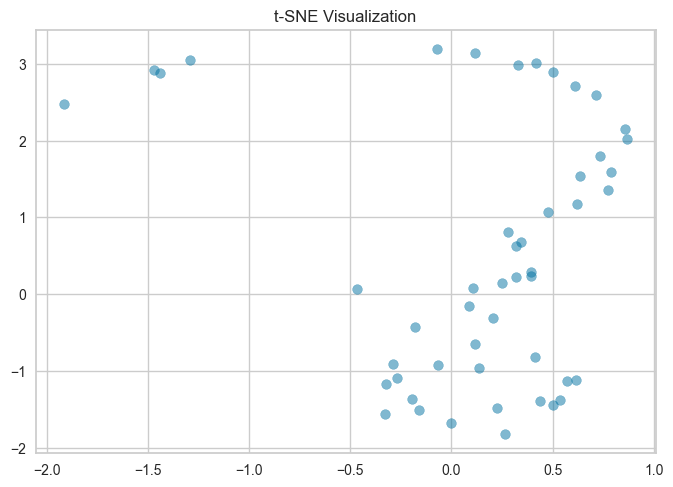

In [15]:
# apply tsne_visualization to visualize the data
exploration.tsne_visualization(data, num_columns)

__Clustering__

In [16]:
### calculate distance matrix
distance_matrix = clustering.gower_distance(data)

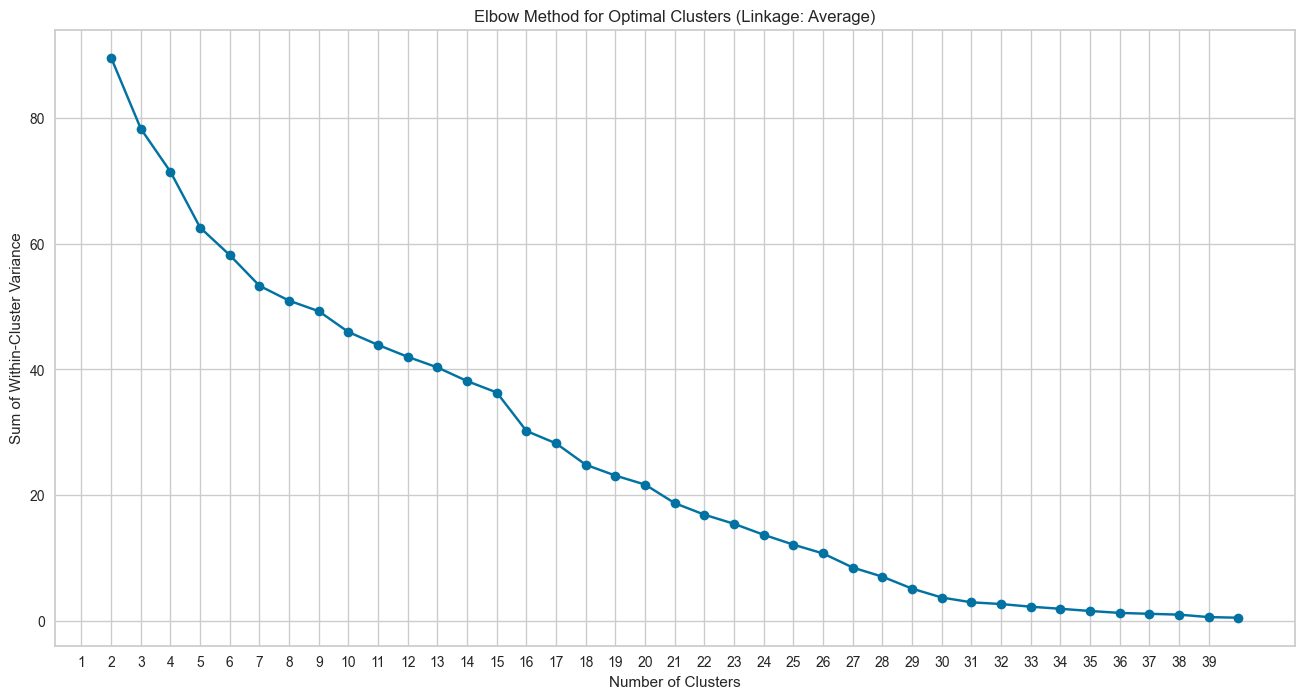

In [17]:
### plot the elbow plot for the first 20 clusters
clustering.elbow_plot_agglomerative(data_preprocessed, distance_matrix, 40)

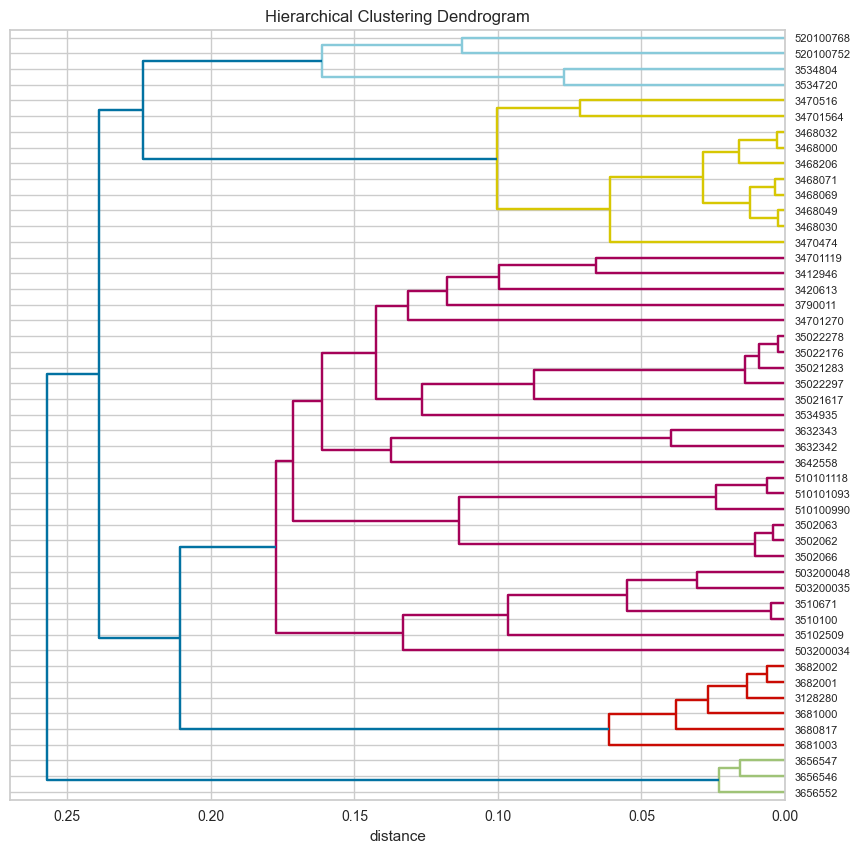

In [18]:
### plot the dendrogram
clustering.plot_dendrogram(distance_matrix, labels=data.index, orientation='left')

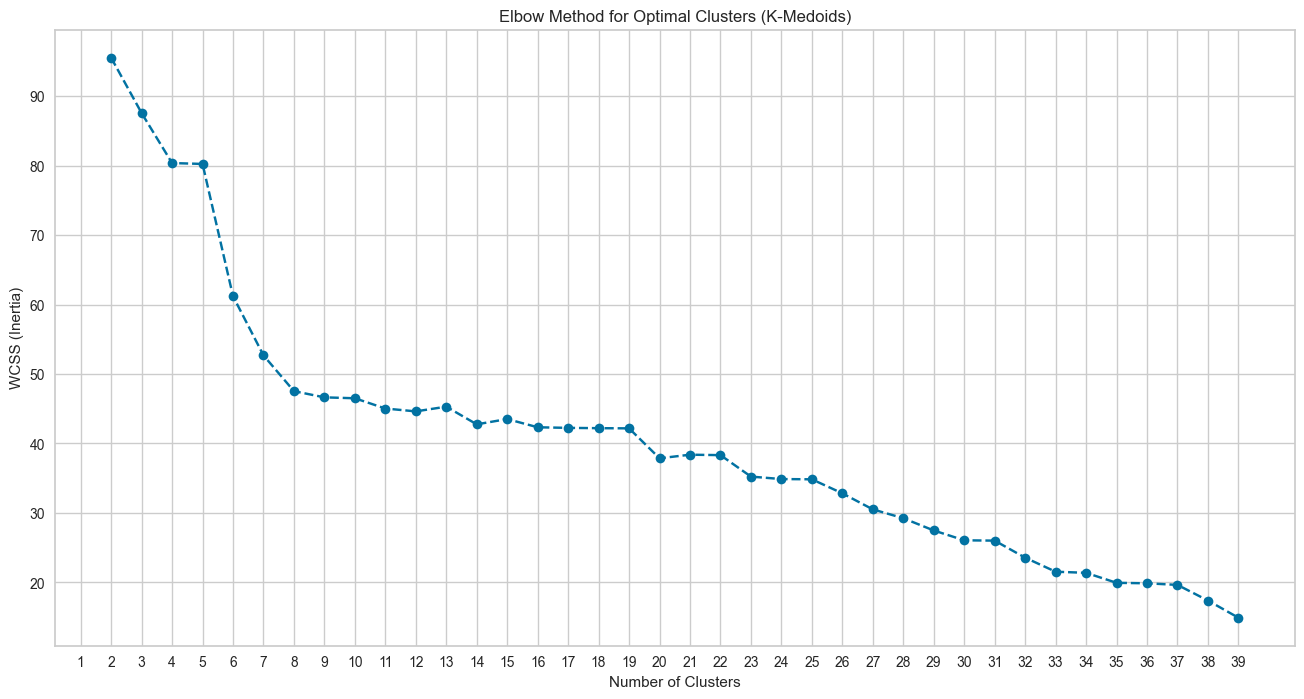

In [19]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.elbow_plot_kmedoids(data_preprocessed, 40)

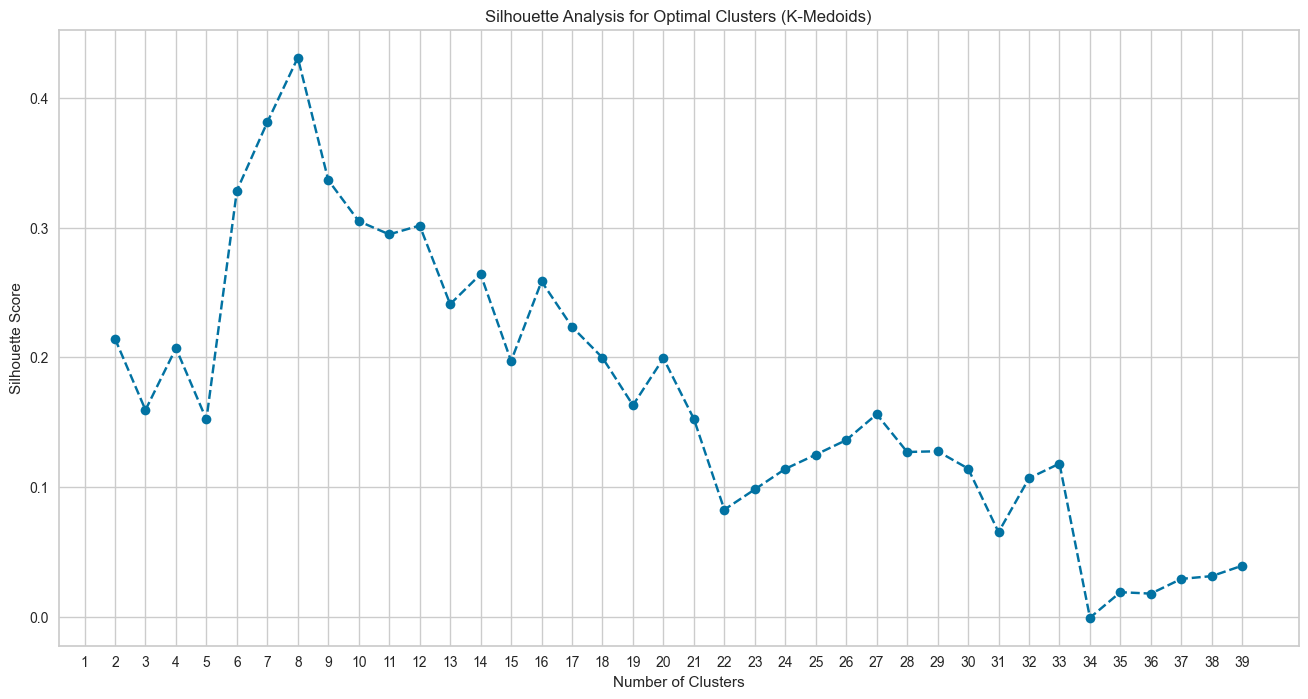

In [20]:
### find clusters with k-medoids and apply elbow and shilouette method
clustering.silhouette_score_kmedoids(data_preprocessed, 40)

In [21]:
# clustering.silhouette_plot_kmedoids(data_preprocessed, [8,12,16,20,27,33])

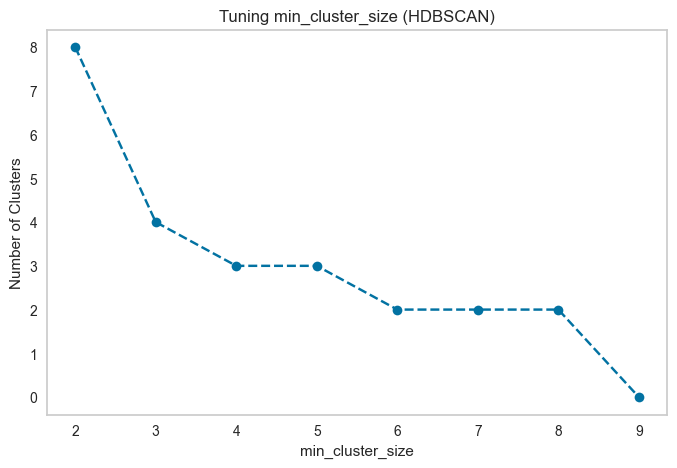

{2: 8, 3: 4, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 0}

In [22]:
### tune min_cluster size for HDBSCAN
min_size_range = range(2, 10)
clustering.tune_min_cluster_size(distance_matrix, min_size_range)

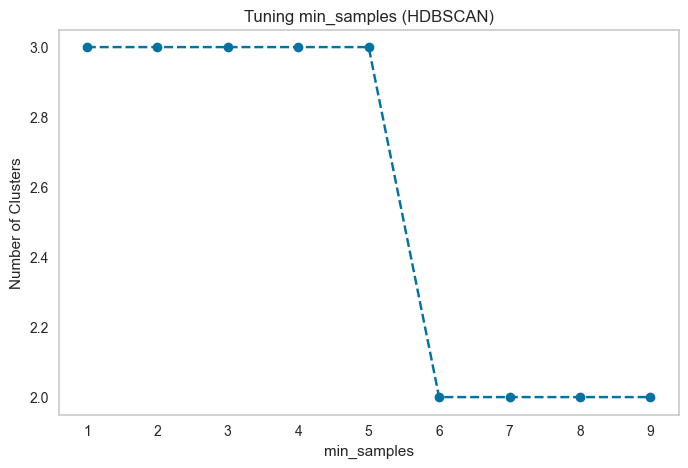

{1: 3, 2: 3, 3: 3, 4: 3, 5: 3, 6: 2, 7: 2, 8: 2, 9: 2}

In [23]:
### tune min_samples for HDBSCAN
min_samples_range = range(1, 10)
clustering.tune_min_samples(distance_matrix, min_samples_range, min_cluster_size=6)

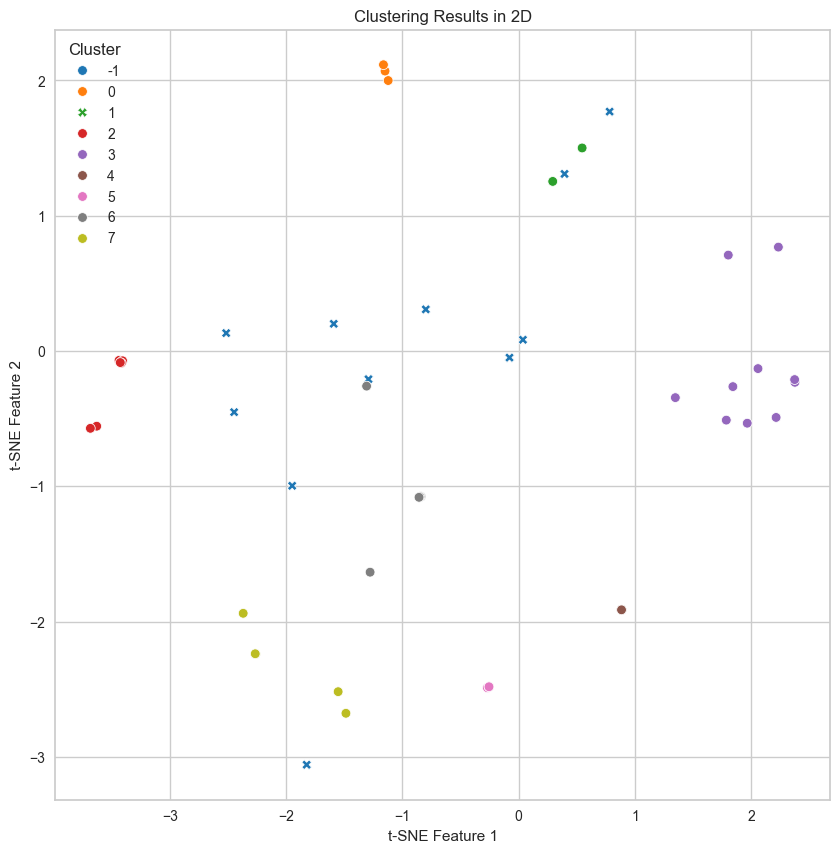

In [24]:
### Perform HDBSCAN clustering with optimal parameters
labels, clusterer = clustering.hdbscan_clustering(distance_matrix, min_cluster_size=2, min_samples=2)
### Visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

__Evaluation__

In [25]:
labels = clustering.agglomerative_clustering(distance_matrix, 16)

In [26]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 0.7709019819257927,
 'ch-score': 11.985845203661306,
 'dunn-index': 1.0166275849833495,
 'silhouette-score': 0.4697780730568488}

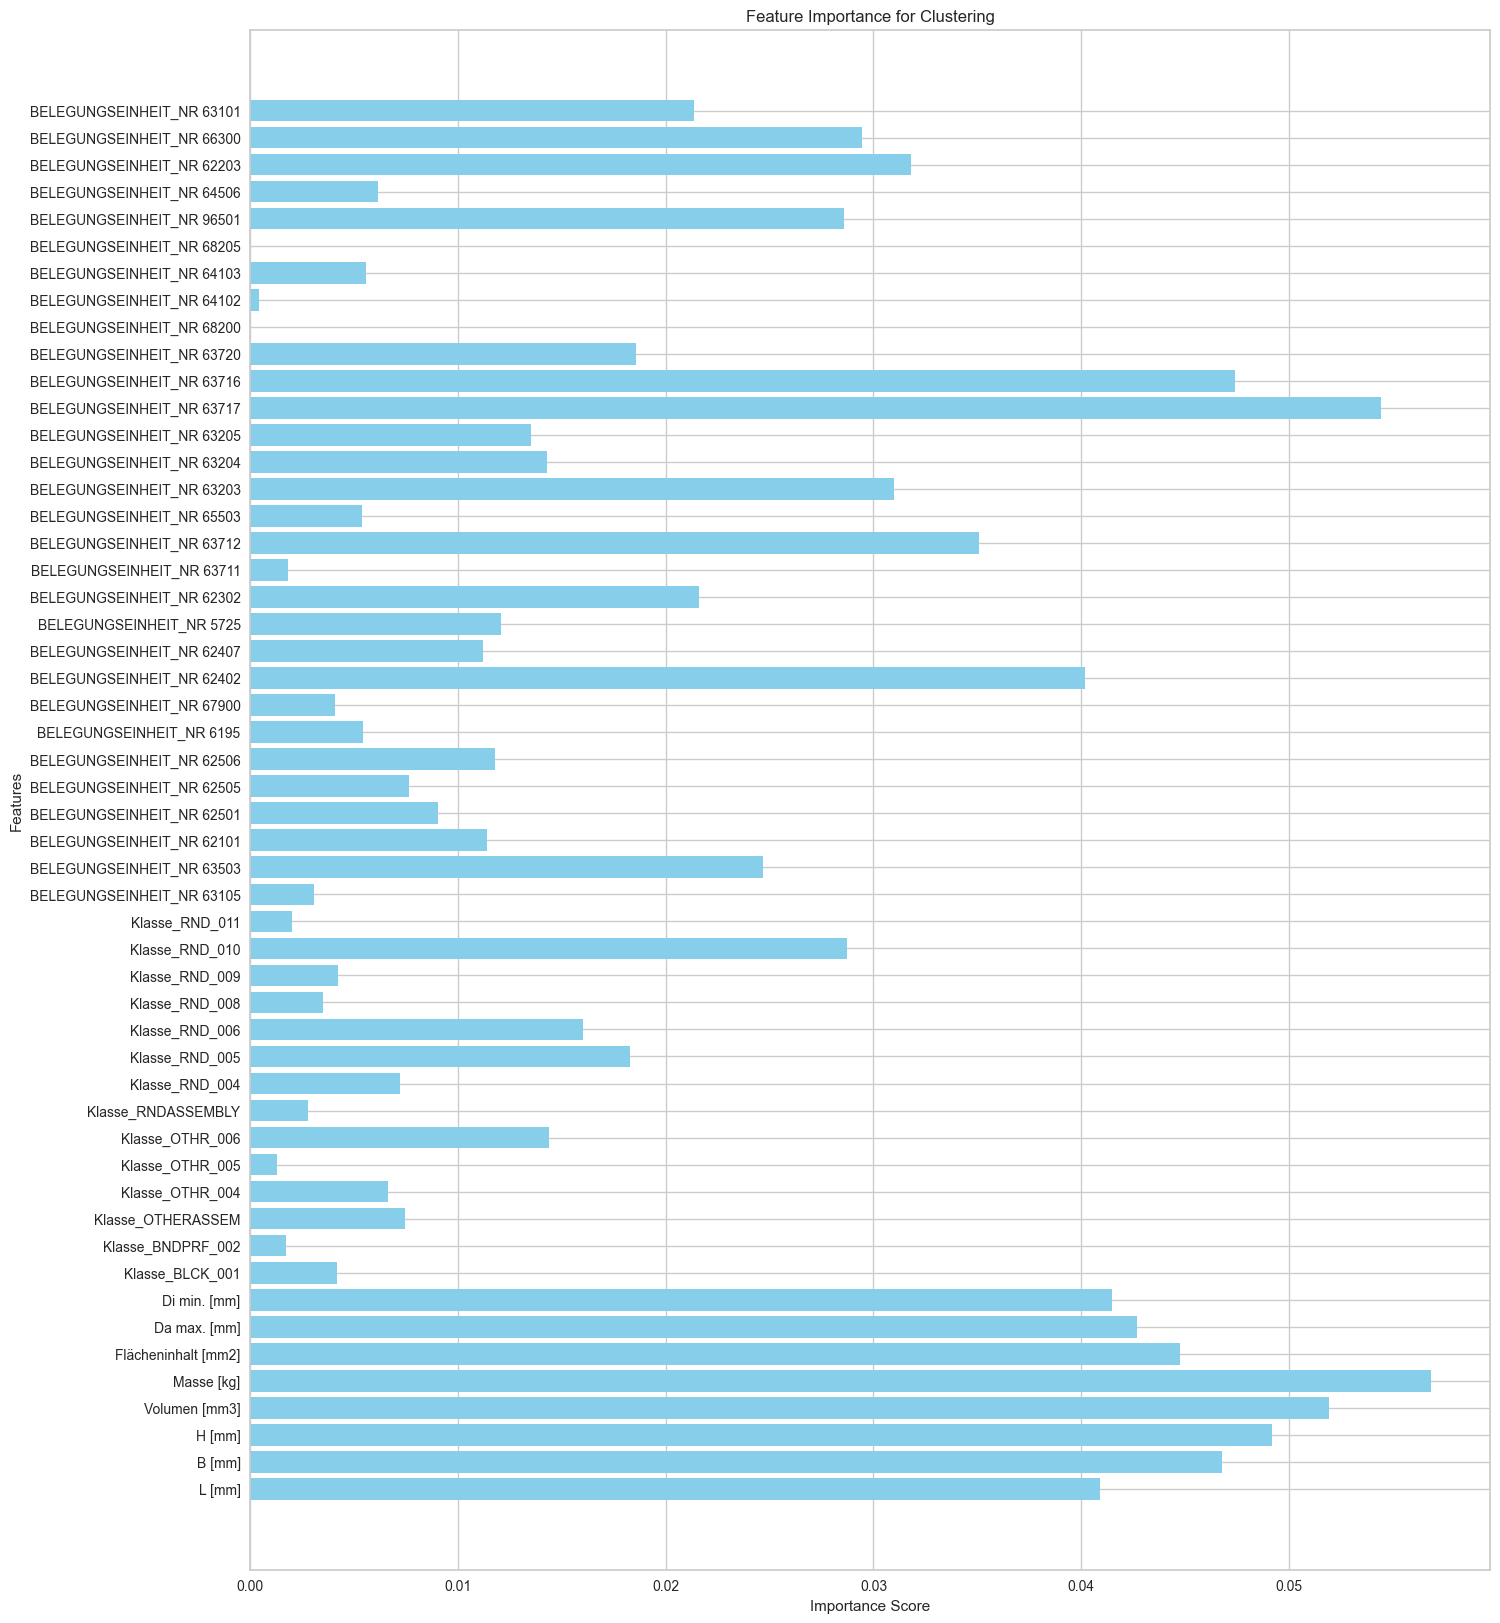

In [27]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

/Users/kaspar/Documents/FIR/Prevelop/prevelop/src/prevelop/evaluation.py:122: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


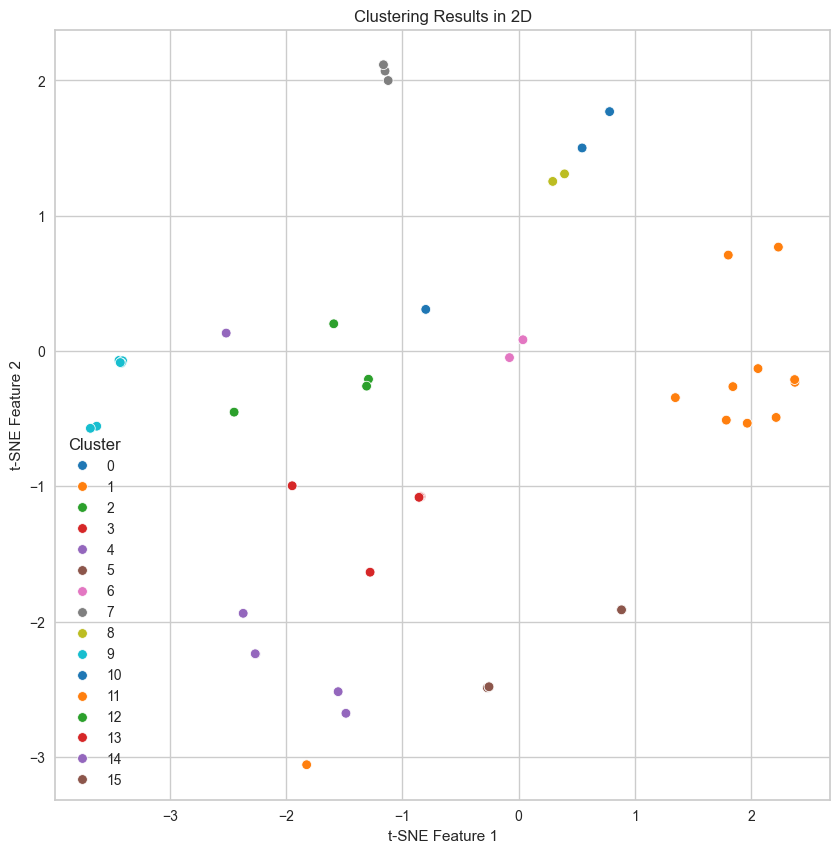

In [28]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)

In [29]:
labels = clustering.kmedoids_clustering(distance_matrix, 27)

In [30]:
### Evaluate the clustering results
evaluation.evaluate_clustering(data_preprocessed, labels)

{'dbi': 1.0836913296849546,
 'ch-score': 2.753819757132701,
 'dunn-index': 0.011059158830434125,
 'silhouette-score': 0.0861777861499028}

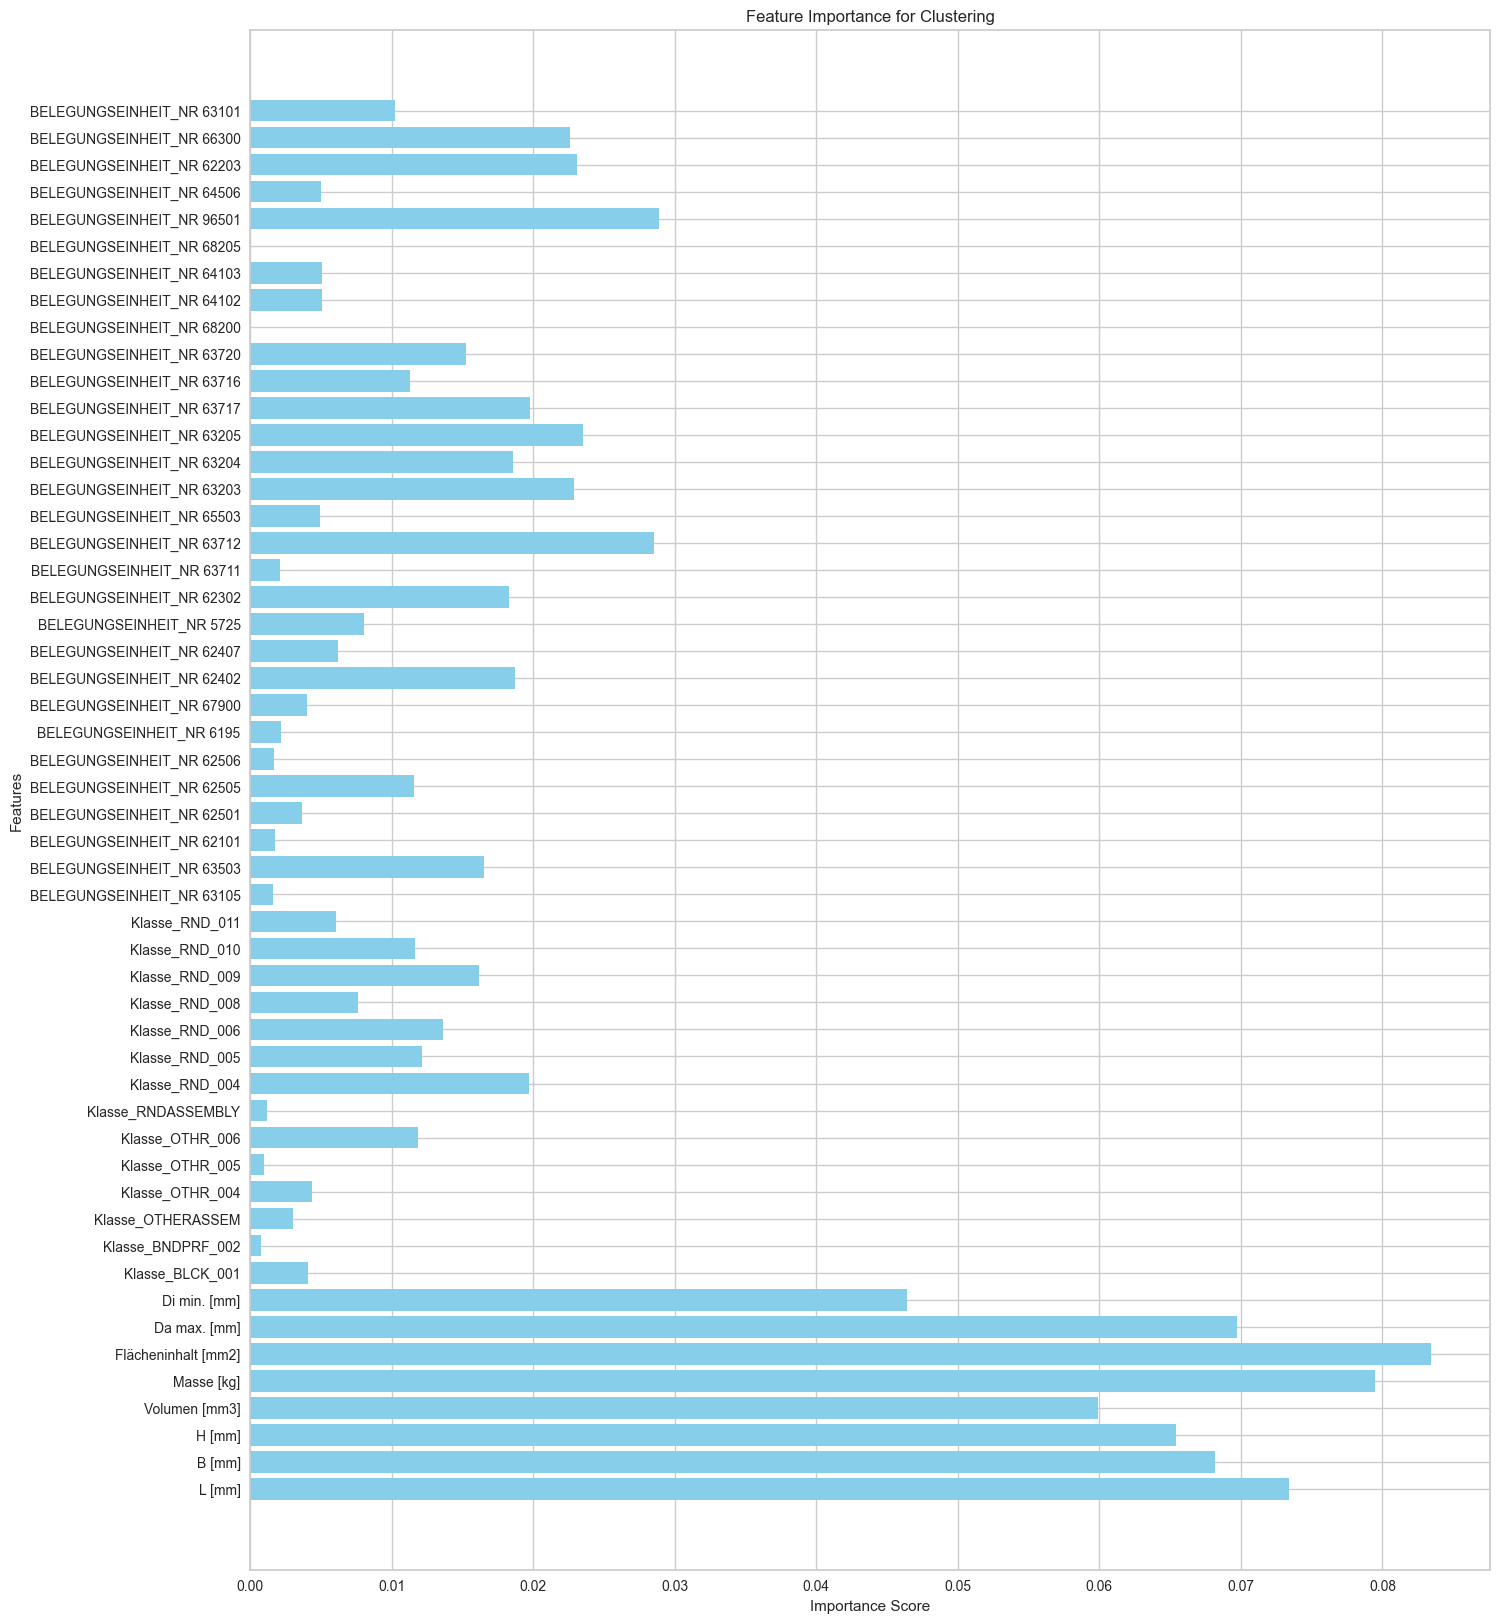

In [31]:
### visualize the feature importance
evaluation.feature_importance(data_preprocessed, labels)

/Users/kaspar/Documents/FIR/Prevelop/prevelop/src/prevelop/evaluation.py:122: UserWarning: The markers list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(


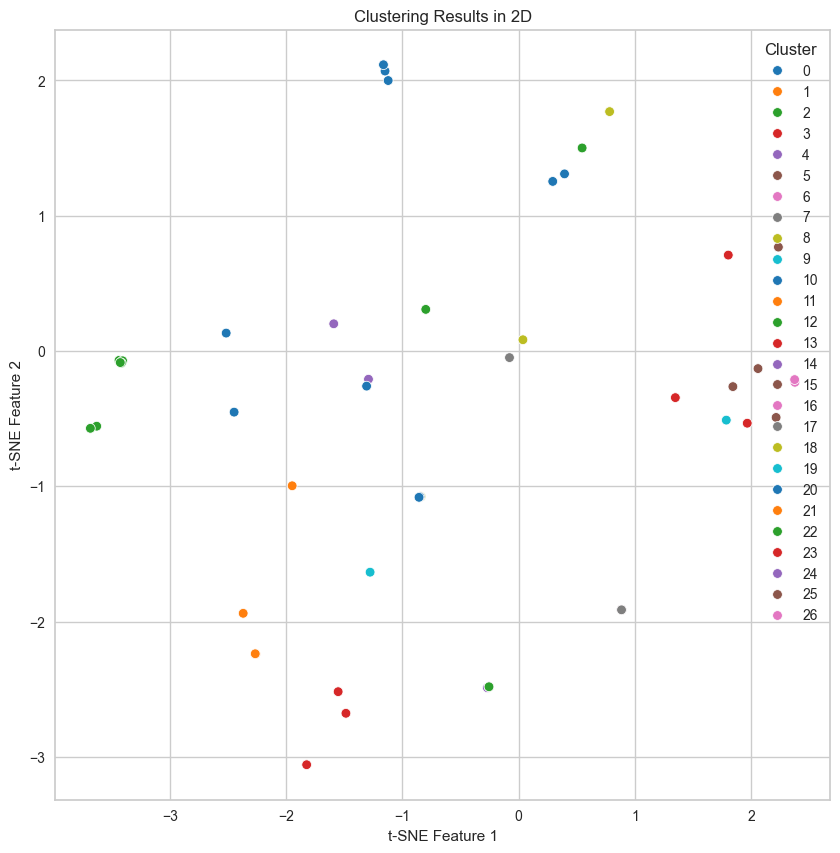

In [32]:
### visualize the results
evaluation.plot_results_2d(data_preprocessed.values, labels)